In [28]:
import matplotlib.pyplot as plt
import pandas as pd
#from ruamel_yaml.compat import ordepireddict

In [29]:
df = pd.read_csv("Data/kitCapstoneJan24_data.csv", sep=";")

## selecting the country that we want

In [30]:
selected_country = 'Country A'
#Get rows with for country A

df_country_a = df[df['countryname'] == selected_country]
df_country_a

,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,sales_actuals_monthly__vehiclegroup04__retail,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
0,1,Country A,296.0,352.0,739.0,471.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Country A,414.0,372.0,904.0,528.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Country A,405.0,604.0,1000.0,953.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Country A,359.0,483.0,828.0,972.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Country A,403.0,474.0,594.0,900.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,356,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,357,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,358,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,359,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## building a additional feature for months (1-12)

important for meanbymonth

In [31]:
df_country_a['month_normalized'] = df_country_a['month'] % 12
df_country_a

df_country_a = df_country_a[['month_normalized', 'month', 'countryname'] + [col for col in df_country_a.columns if
                                                                            col not in ['month_normalized', 'month',
                                                                                        'countryname']]]

df_country_a


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
0,1,1,Country A,296.0,352.0,739.0,471.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,Country A,414.0,372.0,904.0,528.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,Country A,405.0,604.0,1000.0,953.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,Country A,359.0,483.0,828.0,972.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,Country A,403.0,474.0,594.0,900.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,8,356,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,9,357,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,10,358,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,11,359,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## select an vehiclegroup

In [32]:
selcted_vehiclegroup = 'vehiclegroup01'

# delete all columns that are for a diffe

df1 = df_country_a

# create new dataframe with month and all columns containing vehiclegroup01
df2 = df1.filter(regex=selcted_vehiclegroup)
df2.head()

# drop columns in df1 which contain vehiclegroup
df3 = df1.drop(df1.filter(regex='vehiclegroup').columns, axis=1)
df3.head()

# merge df2 and df3 by index
df4 = df2.merge(df3, left_index=True, right_index=True)
df4.head()

# is there a column month in df4?
df4.columns.str.contains('month').any()
# column month should be the first column, second column is countryname
df4 = df4[['month_normalized', 'month', 'countryname'] + [col for col in df4.columns if
                                                          col not in ['month_normalized', 'month', 'countryname']]]

In [33]:
# drop rows after row 258
test = df4.drop(df4.index[258:])

## build different dataframes for internal and external data

In [34]:
# dataframe with first 18 columns (internal data)
df_internal = test.iloc[:, :21]
df_internal.head()

,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_flow_monthly__vehiclegroup01__cp8,sales_stock_monthly__vehiclegroup01__physical,sales_stock_monthly__vehiclegroup01__grossall,sales_stock_monthly__vehiclegroup01__netimporteranddealer,customer_vehicle_relationships__vehiclegroup01__terminated_cars,...,leads__vehiclegroup01__won,leads__vehiclegroup01__first_touch_point,leads__vehiclegroup01__lost,leasing_contracts__vehiclegroup01__end,leasing_contracts__vehiclegroup01__start,premises__vehiclegroup01__flag_order_start,premises__vehiclegroup01__in_sales,premises__vehiclegroup01__flag_production_start,premises__vehiclegroup01__in_production,quota__vehiclegroup01__aq
0,1,1,Country A,296.0,352.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,81.0,NaN,NaN,NaN,NaN,NaN
1,2,2,Country A,414.0,372.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,4.0,130.0,NaN,NaN,NaN,NaN,NaN
2,3,3,Country A,405.0,604.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,2.0,145.0,NaN,NaN,NaN,NaN,NaN
3,4,4,Country A,359.0,483.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,2.0,183.0,NaN,NaN,NaN,NaN,NaN
4,5,5,Country A,403.0,474.0,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,4.0,201.0,NaN,NaN,NaN,NaN,NaN


# dataframe with external features
df_external = test.iloc[:, 21:]
df_external = test['']df_external.
df_external.head()

In [35]:
# dataframe with external features
df_external = test.iloc[:, 21:]
df_external.loc[:, 'month_normalized'] = test['month_normalized']
df_external.head()

,global_consumer__alcoholic_beverages,global_consumer__apparel,global_consumer__apparel_footwear,global_consumer__appliances,global_consumer__automobiles,global_consumer__average_disposable_income_of_urban_households_nominal,global_consumer__average_disposable_income_of_urban_households_real,global_consumer__average_income,global_consumer__beer,global_consumer__building_materials_garden_supply,...,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi,month_normalized
0,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,46.394457,34.695874,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


# building target values


In [36]:
#take every row from 50 to 255 and 
#X = df_internal.iloc[49:255,:-3]
X = df_internal.iloc[49:255, ~df_internal.columns.str.contains('sales_actuals_monthly__vehiclegroup01__orderintake')]
y = df_internal.iloc[49:255, 3]

X_with_target = df_internal.iloc[49:255, :]


In [37]:
X

,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__retail,sales_flow_monthly__vehiclegroup01__cp8,sales_stock_monthly__vehiclegroup01__physical,sales_stock_monthly__vehiclegroup01__grossall,sales_stock_monthly__vehiclegroup01__netimporteranddealer,customer_vehicle_relationships__vehiclegroup01__terminated_cars,customer_vehicle_relationships__vehiclegroup01__active_cars,leads__vehiclegroup01__won,leads__vehiclegroup01__first_touch_point,leads__vehiclegroup01__lost,leasing_contracts__vehiclegroup01__end,leasing_contracts__vehiclegroup01__start,premises__vehiclegroup01__flag_order_start,premises__vehiclegroup01__in_sales,premises__vehiclegroup01__flag_production_start,premises__vehiclegroup01__in_production,quota__vehiclegroup01__aq
49,2,50,Country A,256.0,NaN,NaN,NaN,NaN,78.0,141.0,NaN,NaN,NaN,296.0,197.0,0.0,0.0,0.0,0.0,NaN
50,3,51,Country A,488.0,NaN,NaN,NaN,NaN,79.0,163.0,NaN,NaN,NaN,376.0,285.0,0.0,0.0,0.0,0.0,NaN
51,4,52,Country A,552.0,NaN,NaN,NaN,NaN,84.0,152.0,NaN,NaN,NaN,374.0,346.0,0.0,0.0,200.0,51.0,NaN
52,5,53,Country A,411.0,NaN,NaN,NaN,NaN,73.0,165.0,NaN,NaN,NaN,381.0,401.0,0.0,0.0,0.0,51.0,NaN
53,6,54,Country A,366.0,NaN,NaN,NaN,NaN,143.0,272.0,NaN,NaN,NaN,313.0,328.0,0.0,0.0,0.0,51.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,11,251,Country A,355.0,317.0,331.0,311.0,138.0,564.0,633.0,615.0,218.0,241.0,590.0,432.0,0.0,417.0,0.0,385.0,326.0
251,0,252,Country A,579.0,305.0,259.0,214.0,180.0,355.0,539.0,528.0,184.0,195.0,478.0,299.0,0.0,417.0,0.0,385.0,279.0
252,1,253,Country A,195.0,179.0,272.0,249.0,181.0,353.0,449.0,445.0,187.0,213.0,279.0,128.0,0.0,417.0,0.0,385.0,138.0
253,2,254,Country A,247.0,297.0,326.0,357.0,173.0,371.0,673.0,757.0,267.0,367.0,319.0,158.0,333.0,472.0,0.0,385.0,238.0


In [38]:
y

49     215.0
50     250.0
51     222.0
52     179.0
53     209.0
       ...  
250    323.0
251    262.0
252    266.0
253    531.0
254    621.0
Name: sales_actuals_monthly__vehiclegroup01__orderintake, Length: 206, dtype: float64

## testing wheel

In [39]:

use_all_features = True
# if false, assign checkup_features here
checkup_features = ['quota__vehiclegroup01__aq'], ['sales_flow_monthly__vehiclegroup01__cp8']
input_df = X

#methods
mean_per_month = True
median_per_month = True
interpolation_linear = True
interpolation_spline = True
fill_zero = True

if use_all_features:
    checkup_features = input_df.columns
for feature in checkup_features:
    if input_df[feature].isna().any():
        if mean_per_month:
            # add mean per month
            # Fill in missing values using the corresponding month values
            month_means = {}
            for i in range(len(input_df)):
                month = input_df.iloc[i]['month_normalized']
                month_values = input_df.loc[input_df['month_normalized'] == month, feature]
                if not month_values.isnull().values.all():
                    month_means[month] = month_values.mean()

            # Fill in missing values using the corresponding month values
            input_df[feature + '_meanbymonth'] = input_df[feature].loc[:].fillna(
                input_df['month_normalized'].map(month_means))

        if median_per_month:
            # add median per month
            # Fill in missing values using the corresponding month values
            month_medians = {}
            for i in range(len(input_df)):
                month = input_df.iloc[i]['month_normalized']
                month_values = input_df.loc[input_df['month_normalized'] == month, feature]
                if not month_values.isnull().values.all():
                    month_medians[month] = month_values.median(skipna=True)

            input_df[feature + '_medianbymonth'] = (input_df[feature].loc[:].
                                                    fillna(input_df['month_normalized']
                                                           .map(month_medians)))

        if interpolation_linear:
            input_df[feature + '_interpolated_linear'] = input_df[feature].interpolate(method='linear',
                                                                                       limit_direction='both')

        if interpolation_spline:
            input_df[feature + '_interpolation_spline'] = input_df[feature].interpolate(method='spline',
                                                                                        limit_direction='backward',
                                                                                        order=3)

        if fill_zero:
            input_df[feature + '_fill_zero'] = input_df[feature].fillna(0)

        input_df.drop(columns=feature, inplace=True)

output_df = input_df

In [40]:
y.describe()

count     206.000000
mean      294.660194
std       114.790588
min        40.000000
25%       215.000000
50%       275.000000
75%       349.500000
max      1000.000000
Name: sales_actuals_monthly__vehiclegroup01__orderintake, dtype: float64

In [41]:
output_df.describe()

,month_normalized,month,sales_actuals_monthly__vehiclegroup01__retail,customer_vehicle_relationships__vehiclegroup01__terminated_cars,customer_vehicle_relationships__vehiclegroup01__active_cars,leasing_contracts__vehiclegroup01__end,leasing_contracts__vehiclegroup01__start,premises__vehiclegroup01__flag_order_start,premises__vehiclegroup01__in_sales,premises__vehiclegroup01__flag_production_start,...,leads__vehiclegroup01__lost_meanbymonth,leads__vehiclegroup01__lost_medianbymonth,leads__vehiclegroup01__lost_interpolated_linear,leads__vehiclegroup01__lost_interpolation_spline,leads__vehiclegroup01__lost_fill_zero,quota__vehiclegroup01__aq_meanbymonth,quota__vehiclegroup01__aq_medianbymonth,quota__vehiclegroup01__aq_interpolated_linear,quota__vehiclegroup01__aq_interpolation_spline,quota__vehiclegroup01__aq_fill_zero
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,...,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,5.470874,152.500000,368.626214,256.286408,429.907767,397.456311,279.165049,52.592233,246.737864,59.708738,...,114.335576,113.871359,109.286408,109.285479,109.286408,290.060119,288.973301,272.623786,-9514.918339,261.058252
std,3.456577,59.611241,171.018616,95.392338,175.211611,127.079677,124.620172,152.876608,266.484501,139.259059,...,105.454695,105.463364,107.942173,107.943118,107.942173,127.727518,127.326757,137.587654,46479.573186,152.075612
min,0.000000,50.000000,58.000000,73.000000,141.000000,180.000000,68.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.052558,0.000000,8.000000,8.000000,8.000000,-372584.342302,0.000000
25%,2.250000,101.250000,243.250000,184.250000,302.000000,300.000000,189.000000,0.000000,0.000000,0.000000,...,53.250000,53.250000,33.250000,33.250000,33.250000,225.000000,225.000000,179.250000,173.250000,171.250000
50%,5.000000,152.500000,331.000000,248.000000,390.000000,379.500000,256.500000,0.000000,222.000000,0.000000,...,102.000000,99.750000,91.000000,91.000000,91.000000,295.500000,294.000000,279.000000,279.000000,277.500000
75%,8.000000,203.750000,482.750000,319.000000,538.750000,475.500000,350.500000,0.000000,444.000000,100.000000,...,161.500000,159.000000,159.000000,159.000000,159.000000,362.000000,358.750000,357.250000,357.250000,354.750000
max,11.000000,255.000000,1000.000000,564.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000


In [42]:
output_df.isna().sum()


month_normalized                                                                  0
month                                                                             0
countryname                                                                       0
sales_actuals_monthly__vehiclegroup01__retail                                     0
customer_vehicle_relationships__vehiclegroup01__terminated_cars                   0
customer_vehicle_relationships__vehiclegroup01__active_cars                       0
leasing_contracts__vehiclegroup01__end                                            0
leasing_contracts__vehiclegroup01__start                                          0
premises__vehiclegroup01__flag_order_start                                        0
premises__vehiclegroup01__in_sales                                                0
premises__vehiclegroup01__flag_production_start                                   0
premises__vehiclegroup01__in_production                                     

## SHAP

In [43]:
import xgboost
import shap
from sklearn import metrics
import matplotlib

shap.initjs()

In [44]:
output_df

,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__retail,customer_vehicle_relationships__vehiclegroup01__terminated_cars,customer_vehicle_relationships__vehiclegroup01__active_cars,leasing_contracts__vehiclegroup01__end,leasing_contracts__vehiclegroup01__start,premises__vehiclegroup01__flag_order_start,premises__vehiclegroup01__in_sales,...,leads__vehiclegroup01__lost_meanbymonth,leads__vehiclegroup01__lost_medianbymonth,leads__vehiclegroup01__lost_interpolated_linear,leads__vehiclegroup01__lost_interpolation_spline,leads__vehiclegroup01__lost_fill_zero,quota__vehiclegroup01__aq_meanbymonth,quota__vehiclegroup01__aq_medianbymonth,quota__vehiclegroup01__aq_interpolated_linear,quota__vehiclegroup01__aq_interpolation_spline,quota__vehiclegroup01__aq_fill_zero
49,2,50,Country A,256.0,78.0,141.0,296.0,197.0,0.0,0.0,...,112.647059,125.0,0.0,-0.052558,0.0,287.375000,283.5,83.0,-372584.342302,0.0
50,3,51,Country A,488.0,79.0,163.0,376.0,285.0,0.0,0.0,...,130.294118,129.0,0.0,-0.041219,0.0,345.000000,348.0,83.0,-318419.029304,0.0
51,4,52,Country A,552.0,84.0,152.0,374.0,346.0,0.0,0.0,...,111.812500,123.5,0.0,-0.031460,0.0,320.600000,324.0,83.0,-269769.837258,0.0
52,5,53,Country A,411.0,73.0,165.0,381.0,401.0,0.0,0.0,...,117.625000,121.0,0.0,-0.023176,0.0,332.866667,285.0,83.0,-226340.616395,0.0
53,6,54,Country A,366.0,143.0,272.0,313.0,328.0,0.0,0.0,...,113.750000,100.5,0.0,-0.016263,0.0,364.800000,307.0,83.0,-187835.216947,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,11,251,Country A,355.0,564.0,633.0,590.0,432.0,0.0,417.0,...,241.000000,241.0,241.0,241.000000,241.0,326.000000,326.0,326.0,326.000000,326.0
251,0,252,Country A,579.0,355.0,539.0,478.0,299.0,0.0,417.0,...,195.000000,195.0,195.0,195.000000,195.0,279.000000,279.0,279.0,279.000000,279.0
252,1,253,Country A,195.0,353.0,449.0,279.0,128.0,0.0,417.0,...,213.000000,213.0,213.0,213.000000,213.0,138.000000,138.0,138.0,138.000000,138.0
253,2,254,Country A,247.0,371.0,673.0,319.0,158.0,333.0,472.0,...,367.000000,367.0,367.0,367.000000,367.0,238.000000,238.0,238.0,238.000000,238.0


In [45]:
X = output_df
print(X)
# Replace countrynames with numbers 1 to 4
if 'countryname' in X.columns:
    countryMapping = {'Country A': 1, 'Country B': 2, 'Country C': 3, 'Country D': 4}
    X['countryNo'] = X['countryname'].map(countryMapping)
    X = X.drop('countryname', axis=1)

print(X.dtypes)

#y= df_internal.iloc[:, 3]
y.head()

     month_normalized  month countryname  \
49                  2     50   Country A   
50                  3     51   Country A   
51                  4     52   Country A   
52                  5     53   Country A   
53                  6     54   Country A   
..                ...    ...         ...   
250                11    251   Country A   
251                 0    252   Country A   
252                 1    253   Country A   
253                 2    254   Country A   
254                 3    255   Country A   

     sales_actuals_monthly__vehiclegroup01__retail  \
49                                           256.0   
50                                           488.0   
51                                           552.0   
52                                           411.0   
53                                           366.0   
..                                             ...   
250                                          355.0   
251                                    

49    215.0
50    250.0
51    222.0
52    179.0
53    209.0
Name: sales_actuals_monthly__vehiclegroup01__orderintake, dtype: float64

In [46]:
model = xgboost.XGBRegressor(random_state=400).fit(X, y)

print('Accuracy Score of the Model is: ', model.score(X, y))

explainer = shap.Explainer(model)
shap_values = explainer(X)

Accuracy Score of the Model is:  0.9999999980487839


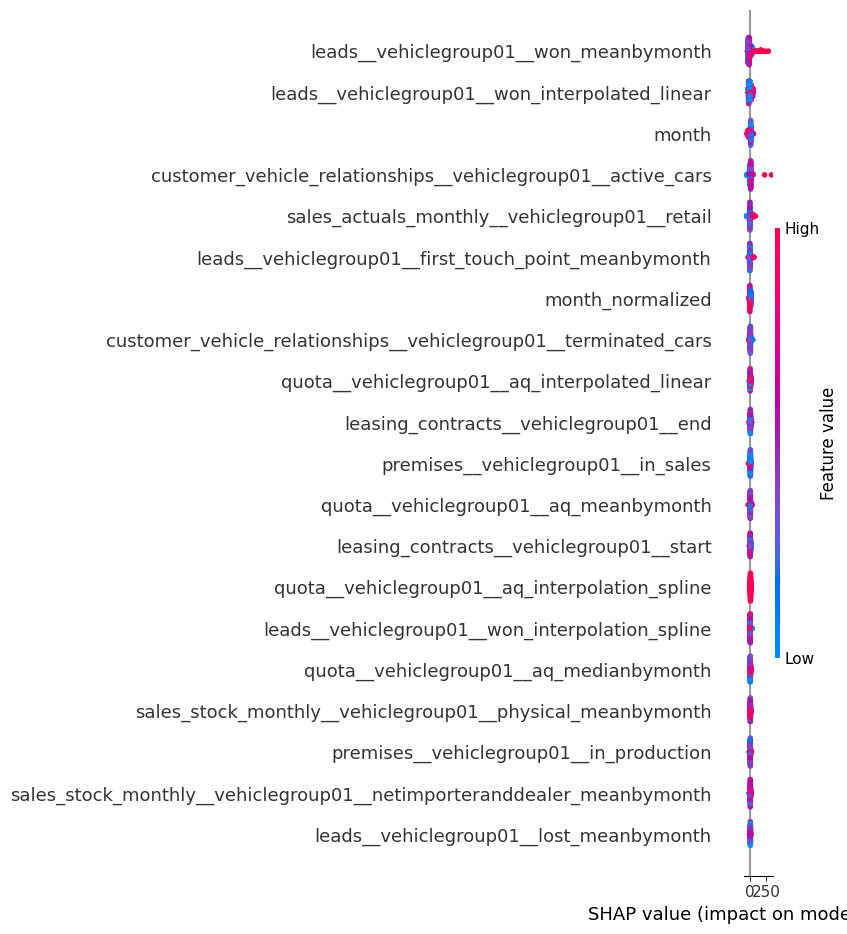

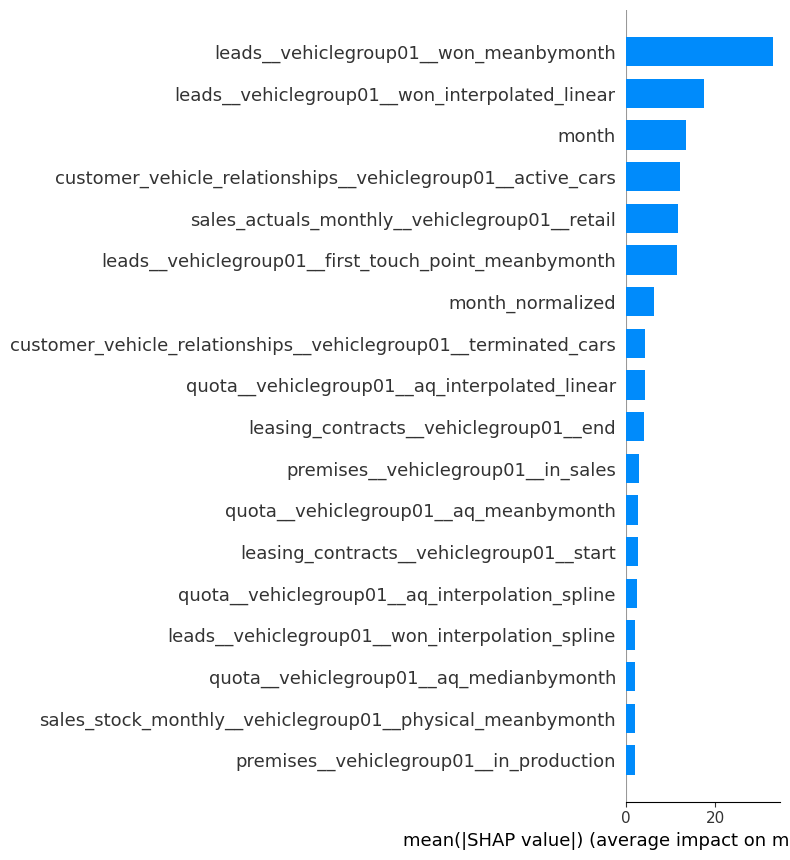

In [48]:
shap.summary_plot(shap_values, X)
shap.summary_plot(shap_values, X, plot_type='bar', max_display=18)

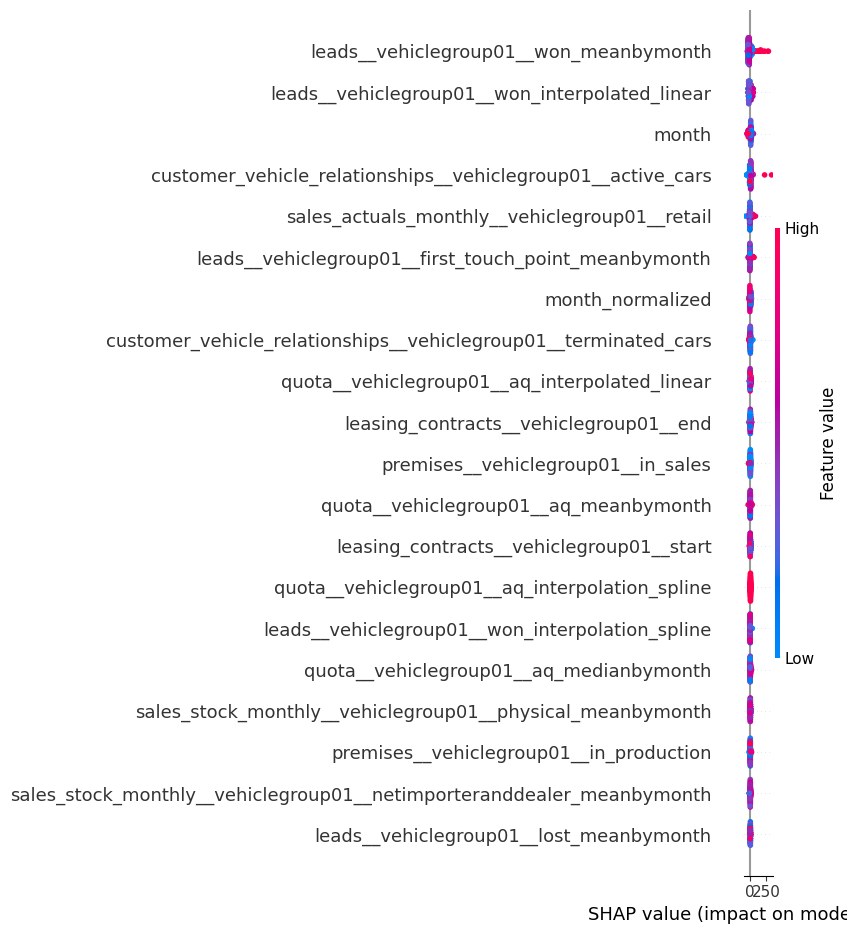

AttributeError: 'NoneType' object has no attribute 'data'

In [49]:
summaryPlot_data = shap.summary_plot(shap_values, X)

feature_names = summaryPlot_data.data[0]
importance_values = summaryPlot_data.data[1]

# Get the top feature

top_feature_index = importance_values.idxmax()
top_feature_name = feature_names[top_feature_index]

In [ ]:
shap_values

In [ ]:
X.columns

Index(['month_normalized', 'month',
       'sales_actuals_monthly__vehiclegroup01__retail',
       'customer_vehicle_relationships__vehiclegroup01__terminated_cars',
       'customer_vehicle_relationships__vehiclegroup01__active_cars',
       'leasing_contracts__vehiclegroup01__end',
       'leasing_contracts__vehiclegroup01__start',
       'premises__vehiclegroup01__flag_order_start',
       'premises__vehiclegroup01__in_sales',
       'premises__vehiclegroup01__flag_production_start',
       'premises__vehiclegroup01__in_production',
       'sales_flow_monthly__vehiclegroup01__cp8_meanbymonth',
       'sales_flow_monthly__vehiclegroup01__cp8_medianbymonth',
       'sales_flow_monthly__vehiclegroup01__cp8_interpolated_linear',
       'sales_flow_monthly__vehiclegroup01__cp8_interpolation_spline',
       'sales_flow_monthly__vehiclegroup01__cp8_fill_zero',
       'sales_stock_monthly__vehiclegroup01__physical_meanbymonth',
       'sales_stock_monthly__vehiclegroup01__physical_medianbym

In [ ]:
#pd.DataFrame(shap_values.values[0], index = X.columns)

shap_df = pd.DataFrame(shap_values.values, columns=X.columns)

# Calculate the mean absolute value for each feature
feature_importance = shap_df.abs().mean(axis=0)

# Create a DataFrame with feature names and their mean absolute SHAP values
feature_importance_df = pd.DataFrame({'Feature': feature_importance.index, 'Mean_SHAP': feature_importance.values})

# Sort the DataFrame based on mean absolute SHAP values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Mean_SHAP', ascending=False)

print(feature_importance_df)

csv_file_path = "shap_values_output_means_final_INTERNAL.csv"
feature_importance_df.to_csv(csv_file_path)

                                              Feature  Mean_SHAP
31             leads__vehiclegroup01__won_meanbymonth  32.735432
33     leads__vehiclegroup01__won_interpolated_linear  17.556135
1                                               month  13.431718
4   customer_vehicle_relationships__vehiclegroup01...  12.004722
2       sales_actuals_monthly__vehiclegroup01__retail  11.594708
36  leads__vehiclegroup01__first_touch_point_meanb...  11.342767
0                                    month_normalized   6.307819
3   customer_vehicle_relationships__vehiclegroup01...   4.272903
48      quota__vehiclegroup01__aq_interpolated_linear   4.272527
5              leasing_contracts__vehiclegroup01__end   4.205444
8                  premises__vehiclegroup01__in_sales   2.904676
46              quota__vehiclegroup01__aq_meanbymonth   2.820481
6            leasing_contracts__vehiclegroup01__start   2.799659
49     quota__vehiclegroup01__aq_interpolation_spline   2.586683
34    leads__vehiclegroup

In [ ]:
feature_importance_df

,Feature,Mean_SHAP
31,leads__vehiclegroup01__won_meanbymonth,32.735432
33,leads__vehiclegroup01__won_interpolated_linear,17.556135
1,month,13.431718
4,customer_vehicle_relationships__vehiclegroup01...,12.004722
2,sales_actuals_monthly__vehiclegroup01__retail,11.594708
36,leads__vehiclegroup01__first_touch_point_meanb...,11.342767
0,month_normalized,6.307819
3,customer_vehicle_relationships__vehiclegroup01...,4.272903
48,quota__vehiclegroup01__aq_interpolated_linear,4.272527
5,leasing_contracts__vehiclegroup01__end,4.205444


In [ ]:
import pandas as pd

# Assuming feature_importance_df is your original DataFrame
endings = ['_meanbymonth', '_medianbymonth', '_interpolated_linear', '_interpolation_spline', '_fill_zero']

def get_base_name(feature_name):
    for ending in endings:
        if ending in feature_name:
            return feature_name.replace(ending, '')
    return feature_name

rows_to_add = []
seen_base_names = set()

for _, row in feature_importance_df.iterrows():
    feature_name = str(row['Feature'])  # Ensure this matches your column name
    base_name = get_base_name(feature_name)

    if base_name not in seen_base_names:
        seen_base_names.add(base_name)
        rows_to_add.append(row)

# Create the new DataFrame from the accumulated rows
new_df = pd.DataFrame(rows_to_add, columns=feature_importance_df.columns)
new_df.reset_index(drop=True, inplace=True)

print(new_df)


                                              Feature  Mean_SHAP
0              leads__vehiclegroup01__won_meanbymonth  32.735432
1                                               month  13.431718
2   customer_vehicle_relationships__vehiclegroup01...  12.004722
3       sales_actuals_monthly__vehiclegroup01__retail  11.594708
4   leads__vehiclegroup01__first_touch_point_meanb...  11.342767
5                                    month_normalized   6.307819
6   customer_vehicle_relationships__vehiclegroup01...   4.272903
7       quota__vehiclegroup01__aq_interpolated_linear   4.272527
8              leasing_contracts__vehiclegroup01__end   4.205444
9                  premises__vehiclegroup01__in_sales   2.904676
10           leasing_contracts__vehiclegroup01__start   2.799659
11  sales_stock_monthly__vehiclegroup01__physical_...   2.052262
12            premises__vehiclegroup01__in_production   2.026091
13  sales_stock_monthly__vehiclegroup01__netimport...   1.981061
14            leads__vehi

In [ ]:
import pandas as pd

# Assuming feature_importance_df is your original DataFrame
endings = ['_meanbymonth', '_medianbymonth', '_interpolated_linear', '_interpolation_spline', '_fill_zero']

def get_base_name(feature_name):
    for ending in endings:
        if ending in feature_name:
            return feature_name.replace(ending, '')
    return feature_name

rows_to_add = []
seen_base_names = set()

for _, row in feature_importance_df.iterrows():
    feature_name = str(row['Feature'])  # Ensure this matches your column name
    base_name = get_base_name(feature_name)

    # Check if the base name is not already in seen_base_names
    if base_name not in seen_base_names:
        seen_base_names.add(base_name)
        rows_to_add.append(row)

# Create the new DataFrame from the accumulated rows
new_df = pd.DataFrame(rows_to_add)
new_df.reset_index(drop=True, inplace=True)

print(new_df)


                                              Feature  Mean_SHAP
0              leads__vehiclegroup01__won_meanbymonth  32.735432
1                                               month  13.431718
2   customer_vehicle_relationships__vehiclegroup01...  12.004722
3       sales_actuals_monthly__vehiclegroup01__retail  11.594708
4   leads__vehiclegroup01__first_touch_point_meanb...  11.342767
5                                    month_normalized   6.307819
6   customer_vehicle_relationships__vehiclegroup01...   4.272903
7       quota__vehiclegroup01__aq_interpolated_linear   4.272527
8              leasing_contracts__vehiclegroup01__end   4.205444
9                  premises__vehiclegroup01__in_sales   2.904676
10           leasing_contracts__vehiclegroup01__start   2.799659
11  sales_stock_monthly__vehiclegroup01__physical_...   2.052262
12            premises__vehiclegroup01__in_production   2.026091
13  sales_stock_monthly__vehiclegroup01__netimport...   1.981061
14            leads__vehi

In [ ]:
featuresFound

[]

In [50]:
features_df = pd.DataFrame(featuresFound, columns=['Feature'])

NameError: name 'featuresFound' is not defined

In [51]:
features_df

NameError: name 'features_df' is not defined

In [52]:
input_df[feature + '_medianbymonth'] = (input_df[feature].loc[:].
                                        fillna(input_df['month_normalized']
                                               .map(month_medians)))

if interpolation_linear:
    input_df[feature + '_interpolated_linear'] = input_df[feature].interpolate(method='linear', limit_direction='both')

if interpolation_spline:
    input_df[feature + '_interpolation_spline'] = input_df[feature].interpolate(method='spline',
                                                                                limit_direction='backward', order=3)

if fill_zero:
    input_df[feature + '_fill_zero'] = input_df[feature].fillna(0)

KeyError: 'quota__vehiclegroup01__aq'